# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Support Vector Machines}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## $\color{deepskyblue}{\text{Preprocessing}}$

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## $\color{deepskyblue}{\text{SVM Model with First Two Features}}$
We used a linear kernel for our model in this part and we have linear decision boundaries. In this part we have taken the first two features for classification.

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## $\color{deepskyblue}{\text{Model Evaluation and Plot Boundaries}}$
As we see our accuracy on test data is 0.9 and our model shows a good discrimination.

In [ ]:
correlation_matrix = np.corrcoef(X_test.T)

f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')

print('Correlation Matrix:')
print(correlation_matrix)
print('\nF1-Score:', f1_score)
print('Precision:', precision)
print('Recall:', recall)
print("Accuracy :" ,accuracy_score(y_pred, y_test))

Correlation Matrix:
[[ 1.         -0.16186599]
 [-0.16186599  1.        ]]

F1-Score: 0.89923273657289
Precision: 0.9013888888888889
Recall: 0.9
Accuracy : 0.9


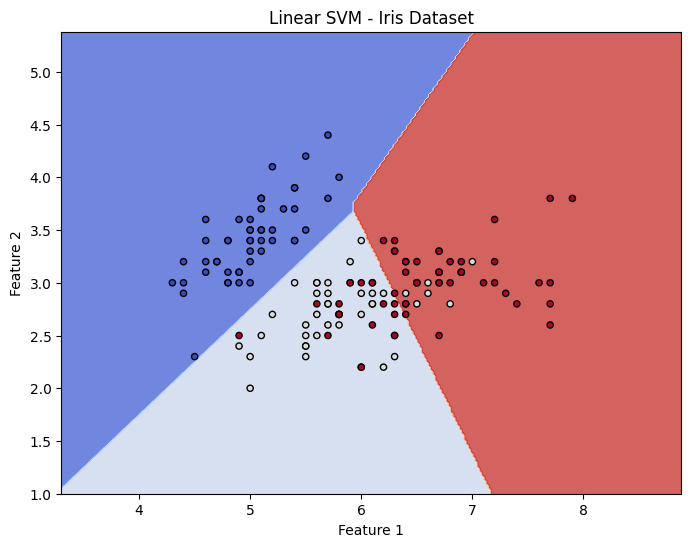

In [ ]:
y_pred = clf.predict(X_test)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM - Iris Dataset')

plt.show()

## $\color{deepskyblue}{\text{SVM Model with Petal Length and Petal Width features}}$
In this part we have used different kernels for SVM and used Petal Length and Petal Width features for classification to have better predictations. Linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

In [ ]:
X_noscale = iris.data[:, 2:4]  # Extract Petal Length and Petal Width features
y = iris.target
scaler = StandardScaler()
X = scaler.fit_transform(X_noscale)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3) 

svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

## $\color{deepskyblue}{\text{Model Evaluation and Plot Boundaries}}$
As we see our accuracy on test data is surprisingly 1.0 and our model shows a good discrimination.

In [ ]:
print("---------------------Train Data---------------------")
print("RBF Kernel:")
print(classification_report(y_train, svm_rbf.predict(X_train)))
print("Linear Kernel:")
print(classification_report(y_train, svm_linear.predict(X_train)))
print("Polynomial Kernel:")
print(classification_report(y_train, svm_poly.predict(X_train)))

---------------------Train Data---------------------
RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.93      0.93        41
           2       0.92      0.92      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.93      0.93        41
           2       0.92      0.92      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.87      1

In [ ]:
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

print("---------------------Test Data---------------------")
print("RBF Kernel:")
print(classification_report(y_test, y_pred_rbf))
print("Linear Kernel:")
print(classification_report(y_test, y_pred_linear))
print("Polynomial Kernel:")
print(classification_report(y_test, y_pred_poly))

---------------------Test Data---------------------
RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.

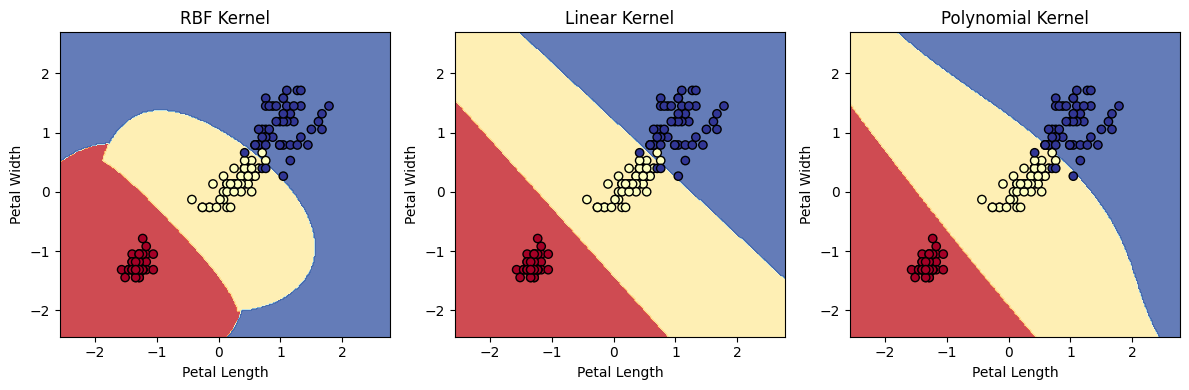

In [ ]:
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, sub = plt.subplots(1, 3, figsize=(12, 4))
titles = ['RBF Kernel', 'Linear Kernel', 'Polynomial Kernel']
classifiers = [svm_rbf, svm_linear, svm_poly]

for i, clf in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    sub[i].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    sub[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    sub[i].set_xlabel('Petal Length')
    sub[i].set_ylabel('Petal Width')
    sub[i].set_title(titles[i])

plt.tight_layout()
plt.show()


## $\color{deepskyblue}{\text{Train with Different Hyperparameters}}$


### $\color{lightgreen}{\text{C = 1 , $\gamma = 100$}}$

In [ ]:
c = 1
gamma_ = 100
svm_rbf = SVC(kernel='rbf', C=c)
svm_linear = SVC(kernel='linear',gamma = gamma_)
svm_poly = SVC(kernel='poly', degree=3, C=c) 

svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
print("---------------------Train Data---------------------")
print("RBF Kernel:")
print(classification_report(y_train, svm_rbf.predict(X_train)))
print("Linear Kernel:")
print(classification_report(y_train, svm_linear.predict(X_train)))
print("Polynomial Kernel:")
print(classification_report(y_train, svm_poly.predict(X_train)))
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

print("---------------------Test Data---------------------")
print("RBF Kernel:")
print(classification_report(y_test, y_pred_rbf))
print("Linear Kernel:")
print(classification_report(y_test, y_pred_linear))
print("Polynomial Kernel:")
print(classification_report(y_test, y_pred_poly))

---------------------Train Data---------------------
RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.66      0.76      0.70        41
           2       0.70      0.59      0.64        39

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120

Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.69      0.76      0.72        41
           2       0.71      0.64      0.68        39

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120

Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.66      0

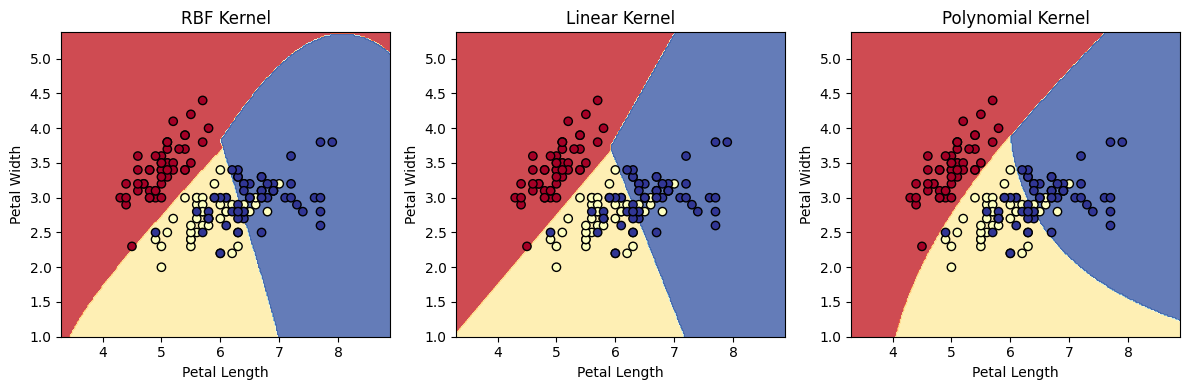

In [ ]:
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, sub = plt.subplots(1, 3, figsize=(12, 4))
titles = ['RBF Kernel', 'Linear Kernel', 'Polynomial Kernel']
classifiers = [svm_rbf, svm_linear, svm_poly]

for i, clf in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    sub[i].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    sub[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    sub[i].set_xlabel('Petal Length')
    sub[i].set_ylabel('Petal Width')
    sub[i].set_title(titles[i])

plt.tight_layout()
plt.show()

### $\color{lightgreen}{\text{C = 10000 , $\gamma = 0.01$}}$

In [ ]:
c = 10000
gamma_ = 0.01
svm_rbf = SVC(kernel='rbf', C=c)
svm_linear = SVC(kernel='linear',gamma = gamma_)
svm_poly = SVC(kernel='poly', degree=3, C=c) 

svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
print("---------------------Train Data---------------------")
print("RBF Kernel:")
print(classification_report(y_train, svm_rbf.predict(X_train)))
print("Linear Kernel:")
print(classification_report(y_train, svm_linear.predict(X_train)))
print("Polynomial Kernel:")
print(classification_report(y_train, svm_poly.predict(X_train)))
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

print("---------------------Test Data---------------------")
print("RBF Kernel:")
print(classification_report(y_test, y_pred_rbf))
print("Linear Kernel:")
print(classification_report(y_test, y_pred_linear))
print("Polynomial Kernel:")
print(classification_report(y_test, y_pred_poly))

---------------------Train Data---------------------
RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.75      0.59      0.66        41
           2       0.65      0.79      0.71        39

    accuracy                           0.79       120
   macro avg       0.80      0.79      0.79       120
weighted avg       0.80      0.79      0.79       120

Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.69      0.76      0.72        41
           2       0.71      0.64      0.68        39

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120

Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.66      0

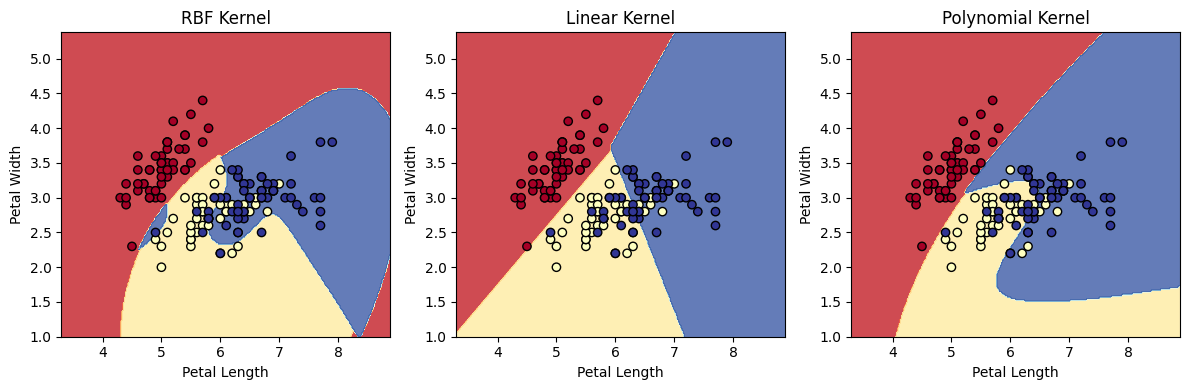

In [ ]:
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, sub = plt.subplots(1, 3, figsize=(12, 4))
titles = ['RBF Kernel', 'Linear Kernel', 'Polynomial Kernel']
classifiers = [svm_rbf, svm_linear, svm_poly]

for i, clf in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    sub[i].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    sub[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    sub[i].set_xlabel('Petal Length')
    sub[i].set_ylabel('Petal Width')
    sub[i].set_title(titles[i])

plt.tight_layout()
plt.show()

### $\color{lightgreen}{\text{C = 0.1 , $\gamma = 0.01$}}$

In [ ]:
c = 0.1
gamma_ = 0.01
svm_rbf = SVC(kernel='rbf', C=c)
svm_linear = SVC(kernel='linear',gamma = gamma_)
svm_poly = SVC(kernel='poly', degree=3, C=c) 

svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
print("---------------------Train Data---------------------")
print("RBF Kernel:")
print(classification_report(y_train, svm_rbf.predict(X_train)))
print("Linear Kernel:")
print(classification_report(y_train, svm_linear.predict(X_train)))
print("Polynomial Kernel:")
print(classification_report(y_train, svm_poly.predict(X_train)))
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

print("---------------------Test Data---------------------")
print("RBF Kernel:")
print(classification_report(y_test, y_pred_rbf))
print("Linear Kernel:")
print(classification_report(y_test, y_pred_linear))
print("Polynomial Kernel:")
print(classification_report(y_test, y_pred_poly))

---------------------Train Data---------------------
RBF Kernel:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       0.60      0.80      0.69        41
           2       0.76      0.41      0.53        39

    accuracy                           0.74       120
   macro avg       0.76      0.74      0.72       120
weighted avg       0.76      0.74      0.73       120

Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.69      0.76      0.72        41
           2       0.71      0.64      0.68        39

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120

Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.65      0

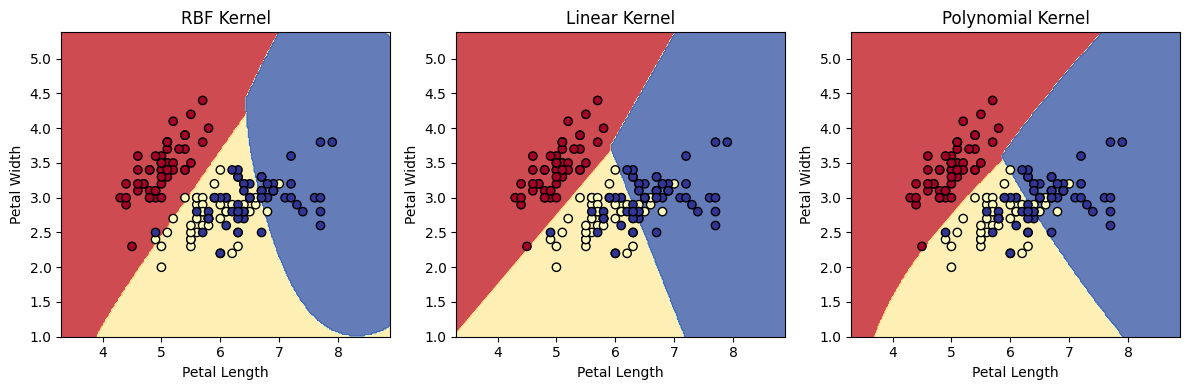

In [ ]:
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, sub = plt.subplots(1, 3, figsize=(12, 4))
titles = ['RBF Kernel', 'Linear Kernel', 'Polynomial Kernel']
classifiers = [svm_rbf, svm_linear, svm_poly]

for i, clf in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    sub[i].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    sub[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    sub[i].set_xlabel('Petal Length')
    sub[i].set_ylabel('Petal Width')
    sub[i].set_title(titles[i])

plt.tight_layout()
plt.show()

### $\color{lightgreen}{\text{C = 10000 , $\gamma = 100$}}$

In [ ]:
c = 10000
gamma_ = 100
svm_rbf = SVC(kernel='rbf', C=c)
svm_linear = SVC(kernel='linear',gamma = gamma_)
svm_poly = SVC(kernel='poly', degree=3, C=c) 

svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
print("---------------------Train Data---------------------")
print("RBF Kernel:")
print(classification_report(y_train, svm_rbf.predict(X_train)))
print("Linear Kernel:")
print(classification_report(y_train, svm_linear.predict(X_train)))
print("Polynomial Kernel:")
print(classification_report(y_train, svm_poly.predict(X_train)))
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

print("---------------------Test Data---------------------")
print("RBF Kernel:")
print(classification_report(y_test, y_pred_rbf))
print("Linear Kernel:")
print(classification_report(y_test, y_pred_linear))
print("Polynomial Kernel:")
print(classification_report(y_test, y_pred_poly))

---------------------Train Data---------------------
RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.75      0.59      0.66        41
           2       0.65      0.79      0.71        39

    accuracy                           0.79       120
   macro avg       0.80      0.79      0.79       120
weighted avg       0.80      0.79      0.79       120

Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.69      0.76      0.72        41
           2       0.71      0.64      0.68        39

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120

Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.66      0

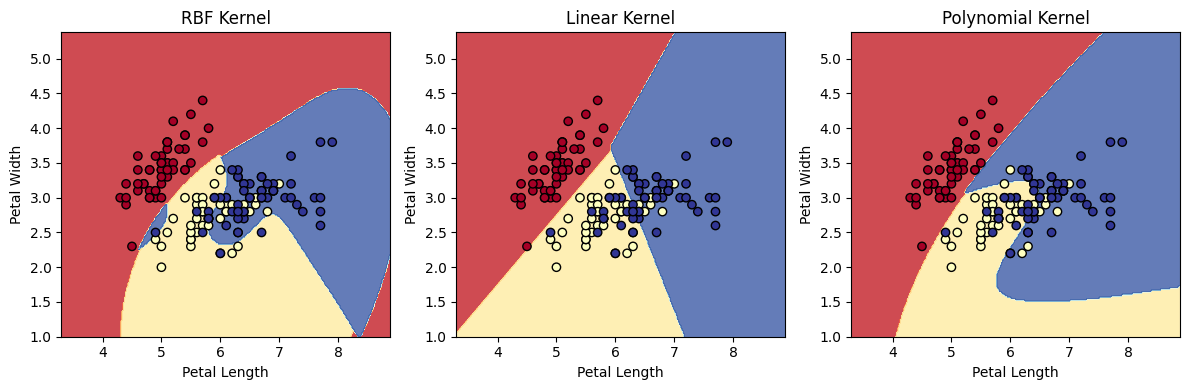

In [ ]:
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

fig, sub = plt.subplots(1, 3, figsize=(12, 4))
titles = ['RBF Kernel', 'Linear Kernel', 'Polynomial Kernel']
classifiers = [svm_rbf, svm_linear, svm_poly]

for i, clf in enumerate(classifiers):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    sub[i].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    sub[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    sub[i].set_xlabel('Petal Length')
    sub[i].set_ylabel('Petal Width')
    sub[i].set_title(titles[i])

plt.tight_layout()
plt.show()

## $\color{deepskyblue}{\text{Hyperparameters Tuning}}$

### $\color{lightgreen}{\text{RBF Kernel}}$
The best values if (C=100, gamma=1).

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.833 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.792 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.875 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.792 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.958 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [ ]:
print(grid.best_estimator_)
print("---------------------Train Data---------------------")
print("RBF Kernel:")
print(classification_report(y_train, grid.predict(X_train)))

pred_grid = grid.predict(X_test)

print("---------------------Test Data---------------------")
print("RBF Kernel:")
print(classification_report(y_test, pred_grid))

SVC(C=100, gamma=1)
---------------------Train Data---------------------
RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.98      0.96        41
           2       0.97      0.95      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

---------------------Test Data---------------------
RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### $\color{lightgreen}{\text{Linear Kernel}}$
The best values if (C=100, gamma=1).

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.833 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.833 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.958 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.958 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [ ]:
print(grid.best_estimator_)
print("---------------------Train Data---------------------")
print("Linear Kernel:")
print(classification_report(y_train, grid.predict(X_train)))

pred_grid = grid.predict(X_test)

print("---------------------Test Data---------------------")
print("Linear Kernel:")
print(classification_report(y_test, pred_grid))

SVC(C=100, gamma=1, kernel='linear')
---------------------Train Data---------------------
Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.93      0.94        41
           2       0.93      0.95      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

---------------------Test Data---------------------
Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### $\color{lightgreen}{\text{Polynomial Kernel}}$
The best values if (C=100, gamma=1).

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(kernel='poly', degree=3), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.917 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.917 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.958 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.833 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.833 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [ ]:
print(grid.best_estimator_)
print("---------------------Train Data---------------------")
print("Polynomial Kernel:")
print(classification_report(y_train, grid.predict(X_train)))

pred_grid = grid.predict(X_test)

print("---------------------Test Data---------------------")
print("Polynomial Kernel:")
print(classification_report(y_test, pred_grid))

SVC(C=100, gamma=1, kernel='poly')
---------------------Train Data---------------------
Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.98      0.95        41
           2       0.97      0.92      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

---------------------Test Data---------------------
Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## $\color{deepskyblue}{\text{Different SVM Classifiers and OneVsRest, OneVsOne Strategies}}$
The results indicate that OneVsOne has better discrimination compared to OneVsRest in linear kernels but in other kernels, two strategies show similar results.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
models = (
    OneVsRestClassifier(SVC(kernel='linear', C=100)),
    OneVsOneClassifier(SVC(kernel='linear', C=100)),
    OneVsRestClassifier(SVC(kernel='rbf', gamma=1, C=100)),
    OneVsOneClassifier(SVC(kernel='rbf', gamma=1, C=100)),
    OneVsRestClassifier(SVC(kernel='poly', degree=3, C=100)),
    OneVsOneClassifier(SVC(kernel='poly', degree=3, C=100))
)
models = (clf.fit(X_train, y_train) for clf in models)

In [ ]:
kernels = ['linear_o_v_r','linear_o_v_o', 'rbf_o_v_r', 'rbf_o_v_o','poly_o_v_r', 'poly_o_v_o']
i = 0
for clf in models:
    print("Kernel = " +kernels[i])
    pred_test = clf.predict(X_test)
    pred_train = clf.predict(X_train)
    print("---------------------Train Data---------------------")
    print(classification_report(y_train, pred_train))
    print("---------------------Test Data---------------------")
    print(classification_report(y_test, pred_test))
    i+=1

Kernel = linear_o_v_r
---------------------Train Data---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.91      0.92        33
           2       0.92      0.94      0.93        35

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

---------------------Test Data---------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.88      0.88      0.88        17
           2       0.88      0.93      0.90        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.92        45
weighted avg       0.91      0.91      0.91        45

Kernel = linear_o_v_o
---------------------Train Data---------------------
              precision    recall  f